In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# read in data file
oscar_dataset = pd.read_csv("the_oscar_award.csv")

# inspect
oscar_dataset.head()


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [3]:

#summarize
oscar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


In [4]:
#count null values
print(oscar_dataset.isna().sum())
#drop null values
oscars_clean = oscar_dataset.dropna(subset = "film")
print(oscars_clean.isna().sum())

#print unique values in category
print(oscars_clean["category"].unique())


year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             315
winner             0
dtype: int64
year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64
['ACTOR' 'ACTRESS' 'ART DIRECTION' 'CINEMATOGRAPHY'
 'DIRECTING (Comedy Picture)' 'DIRECTING (Dramatic Picture)'
 'ENGINEERING EFFECTS' 'OUTSTANDING PICTURE' 'UNIQUE AND ARTISTIC PICTURE'
 'WRITING (Adaptation)' 'WRITING (Original Story)'
 'WRITING (Title Writing)' 'DIRECTING' 'WRITING' 'OUTSTANDING PRODUCTION'
 'SOUND RECORDING' 'SHORT SUBJECT (Cartoon)' 'SHORT SUBJECT (Comedy)'
 'SHORT SUBJECT (Novelty)' 'ASSISTANT DIRECTOR' 'FILM EDITING'
 'MUSIC (Scoring)' 'MUSIC (Song)' 'DANCE DIRECTION' 'WRITING (Screenplay)'
 'ACTOR IN A SUPPORTING ROLE' 'ACTRESS IN A SUPPORTING ROLE'
 'SHORT SUBJECT (Color)' 'SHORT SUBJECT (One-reel)'
 'SHORT SUBJECT (Two-reel)' 'MUSIC (Original Score)'
 'CINEM

In [7]:

#only include the categories from the website
filtered_categories = ['ACTOR IN A LEADING ROLE','ACTRESS IN A LEADING ROLE','ACTOR IN A SUPPORTING ROLE','ACTRESS IN A SUPPORTING ROLE', 'ANIMATED FEATURE FILM', 
            'CINEMATOGRAPHY','COSTUME DESIGN','DIRECTING','DOCUMENTARY FEATURE FILM','FILM EDITING','INTERNATIONAL FEATURE FILM','MAKEUP AND HAIRSTYLING',
            'MUSIC (ORIGINAL SCORE)','MUSIC (ORIGINAL SONG)','BEST PICTURE','PRODUCTION DESIGN','ANIMATED SHORT FILM','LIVE ACTION SHORT FILM',
            'SOUND','VISUAL EFFECTS','WRITING (ADAPTED SCREENPLAY)','WRITING (ORIGINAL SCREENPLAY)']
#filtered years to be more recent (past 10 yrs)
filtered_years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]


# Create a new DataFrame with only filtered categories
filtered_data = oscars_clean[oscars_clean['category'].isin(filtered_categories)]
filtered_data = filtered_data[filtered_data['year_film'].isin(filtered_years)]

#checking
print(filtered_data.head())


      year_film  year_ceremony  ceremony                 category  \
9388       2012           2013        85  ACTOR IN A LEADING ROLE   
9389       2012           2013        85  ACTOR IN A LEADING ROLE   
9390       2012           2013        85  ACTOR IN A LEADING ROLE   
9391       2012           2013        85  ACTOR IN A LEADING ROLE   
9392       2012           2013        85  ACTOR IN A LEADING ROLE   

                   name                     film  winner  
9388     Bradley Cooper  Silver Linings Playbook   False  
9389   Daniel Day-Lewis                  Lincoln    True  
9390       Hugh Jackman           Les Misérables   False  
9391    Joaquin Phoenix               The Master   False  
9392  Denzel Washington                   Flight   False  


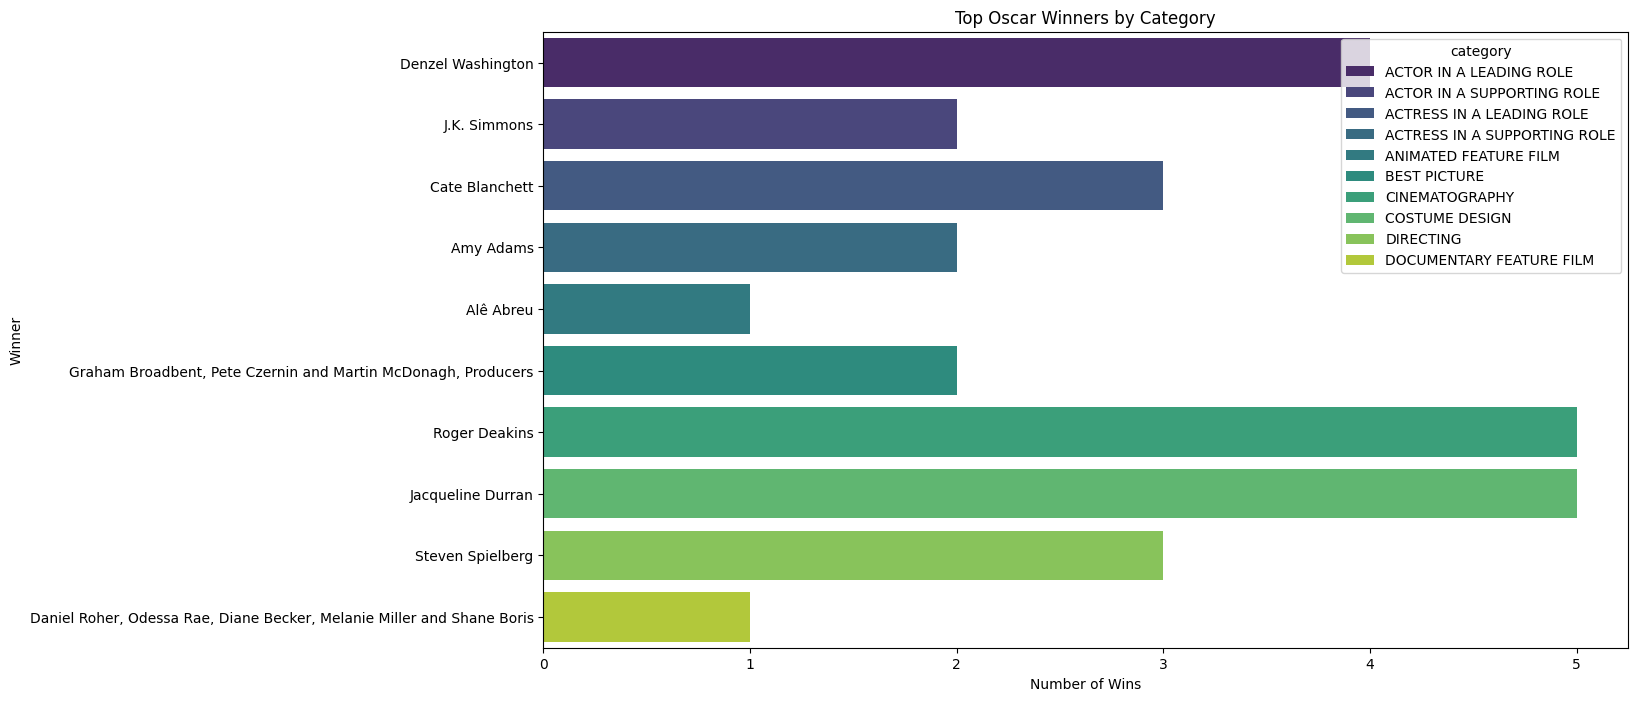

In [9]:

# Find the most frequent winners for each category
top_winners_by_category = filtered_data.groupby(['category', 'name']).size().reset_index(name='count')
top_winners_by_category = top_winners_by_category.sort_values(by=['category', 'count'], ascending=[True, False])
top_winners_by_category = top_winners_by_category.drop_duplicates(subset='category', keep='first')

# Plot the top winners by category
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='name', hue='category', data=top_winners_by_category.head(10), palette='viridis')
plt.title('Top Oscar Winners by Category')
plt.xlabel('Number of Wins')
plt.ylabel('Winner')
plt.show()


/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_12588/654125118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_nominations', y='film', data=movie_nominations.head(10), palette='viridis')


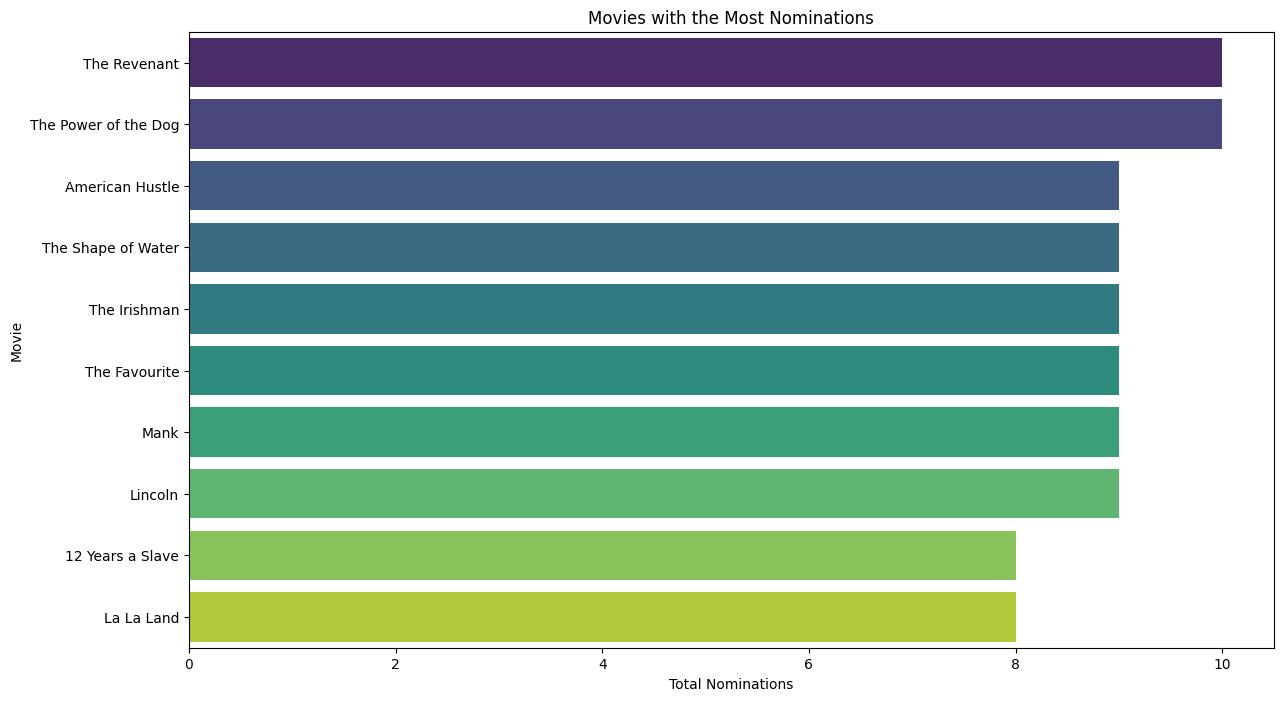

In [10]:
# Find the total nominations for each movie
movie_nominations = filtered_data.groupby('film').size().reset_index(name='total_nominations')
movie_nominations = movie_nominations.sort_values(by='total_nominations', ascending=False)

# Plot the top movies with the most nominations
plt.figure(figsize=(14, 8))
sns.barplot(x='total_nominations', y='film', data=movie_nominations.head(10), palette='viridis')
plt.title('Movies with the Most Nominations')
plt.xlabel('Total Nominations')
plt.ylabel('Movie')
plt.show()



In [47]:
#import current oscar nominations
oscars_2024 = pd.read_excel("Oscars_2024.xlsx")

#inspect
oscars_2024.info()
oscars_2024.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              120 non-null    object 
 1   Names                 120 non-null    object 
 2   Film                  120 non-null    object 
 3   Genre                 120 non-null    object 
 4   Worldwide Box Office  99 non-null     float64
 5   Rotten Tomatoes       105 non-null    float64
dtypes: float64(2), object(4)
memory usage: 5.8+ KB


,Category,Names,Film,Genre,Worldwide Box Office,Rotten Tomatoes
0,Actor In A Leading Role,Bradley Cooper,Maestro,"Romance, Musical",383532.0,0.79
1,Actor In A Leading Role,Colman Domingo,Rustin,Drama,NaN,0.84
2,Actor In A Leading Role,Paul Giamatti,The Holdovers,"Comedy, Drama",42246660.0,0.97
3,Actor In A Leading Role,Cillian Murphy,Oppenheimer,Thriller,957700200.0,0.93
4,Actor In A Leading Role,Jeffrey Wright,American Fiction,"Comedy, Drama",21983570.0,0.94
5,Actress In A Leading Role,Annette Bening,Nyad,"Sports, Drama",16056.0,0.86
6,Actress In A Leading Role,Lily Gladstone,Killers of the Flower Moon,"Crime, Western",156874211.0,0.93
7,Actress In A Leading Role,Sandra Huller,Anatomy of a Fall,"Crime, Thriller",31054565.0,0.96
8,Actress In A Leading Role,Carey Mulligan,Maestro,"Romance, Musical",383532.0,0.79
9,Actress In A Leading Role,Emma Stone,Poor Things,"Comedy, Sci-fi",104571592.0,0.92


/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_14239/141745907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_nominations', y='Film', data=movie_nominations_2024.head(10), palette='viridis')


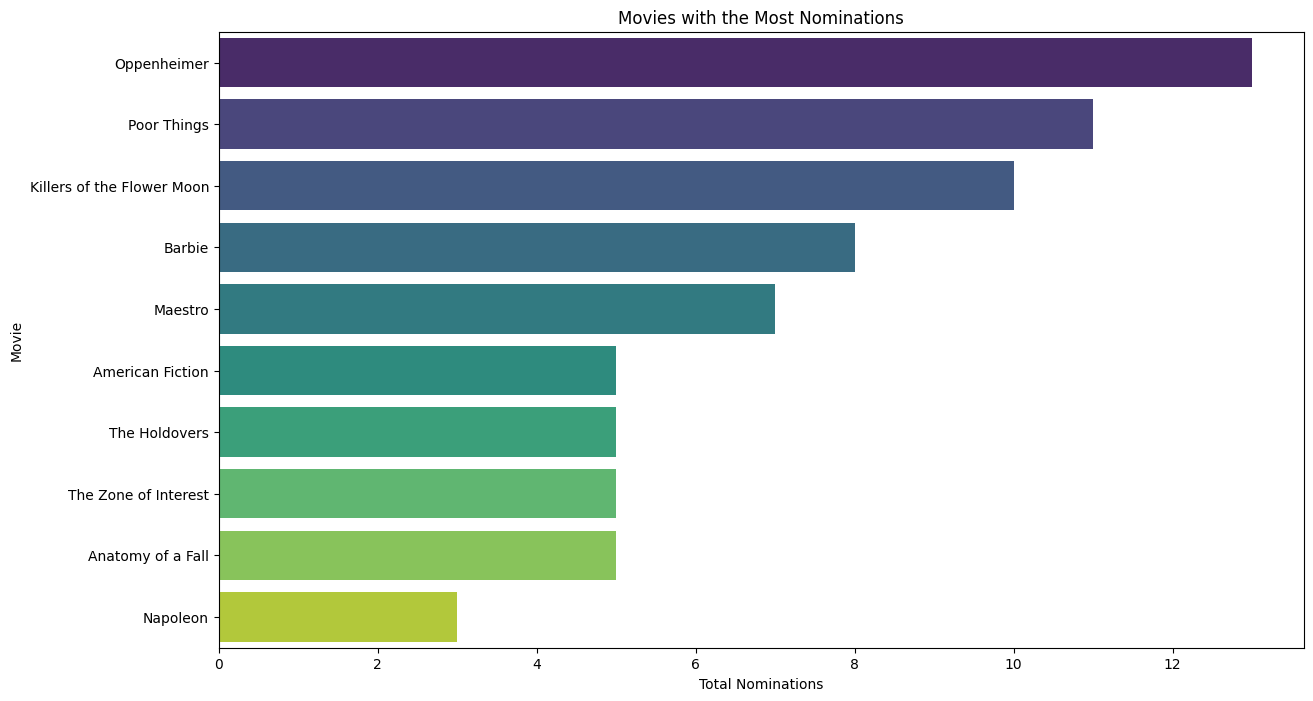

In [48]:
#visuals: Movies with most nominations
movie_nominations_2024 = oscars_2024.groupby('Film').size().reset_index(name='total_nominations')
movie_nominations_2024 = movie_nominations_2024.sort_values(by='total_nominations', ascending=False)

# Plot the top movies with the most nominations
plt.figure(figsize=(14, 8))
sns.barplot(x='total_nominations', y='Film', data=movie_nominations_2024.head(10), palette='viridis')
plt.title('Movies with the Most Nominations')
plt.xlabel('Total Nominations')
plt.ylabel('Movie')
plt.show()


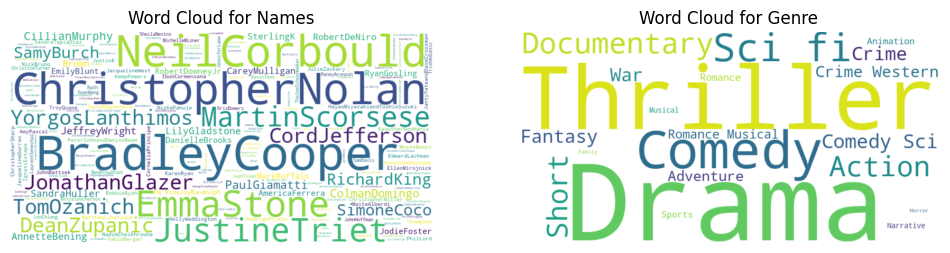

In [60]:
# Combine first and last names with an underscore
oscars_2024['Full Name'] = oscars_2024['Names'].str.replace(' ', '')

# Generate word cloud for names
def generate_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Plot the word cloud for names
wordcloud_names = generate_wordcloud(' '.join(oscars_2024['Full Name']))
# Replace underscores with spaces before displaying
wordcloud_names.words_ = {key.replace('_', ' '): value for key, value in wordcloud_names.words_.items()}
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_names, interpolation='bilinear')
plt.title('Word Cloud for Names')
plt.axis('off')

# Plot the word cloud for genres
wordcloud_genre = generate_wordcloud(' '.join(oscars_2024['Genre']))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_genre, interpolation='bilinear')
plt.title('Word Cloud for Genre')
plt.axis('off')

plt.show()